   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN       

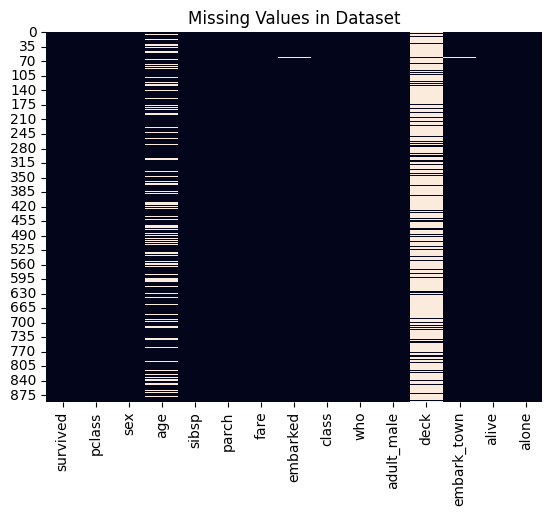

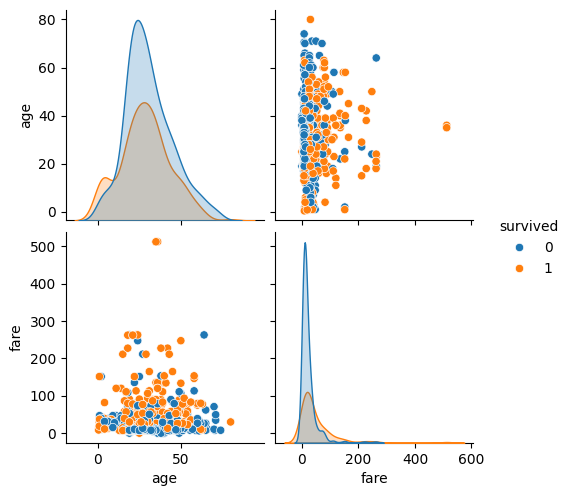

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset from Seaborn
df = sns.load_dataset('titanic')

# Quick look at the data
print(df.head())

# Descriptive statistics
print(df.describe(include='all'))

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values in Dataset")
plt.show()

# Pairplot of selected features
sns.pairplot(df[['age', 'fare', 'survived', 'sex']], hue='survived')
plt.show()


2. Data Preprocessing

In [2]:
# Handle missing values using SimpleImputer for numeric and categorical data
imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])

# Fill categorical missing values with the most frequent value
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop columns that won't be useful for modeling
df.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male'], axis=1, inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['embarked'] = label_encoder.fit_transform(df['embarked'])
df['class'] = label_encoder.fit_transform(df['class'])

# Impute missing values in 'age' and drop rows with missing 'embarked'
df.dropna(subset=['embarked'], inplace=True)
df['age'] = imputer.fit_transform(df[['age']])

# Split data into features and target variable
X = df.drop('survived', axis=1)
y = df['survived']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<ipython-input-2-4b34171fc7e3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


3. Model Building

In [3]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for ROC


4. Model Evaluation

Accuracy: 0.8100558659217877
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1 Score: 0.7605633802816901
ROC-AUC Score: 0.8863577863577864


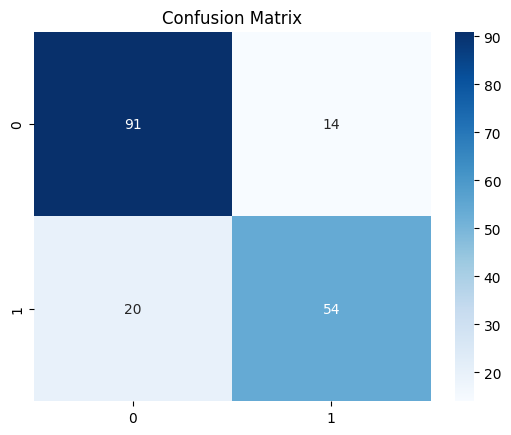

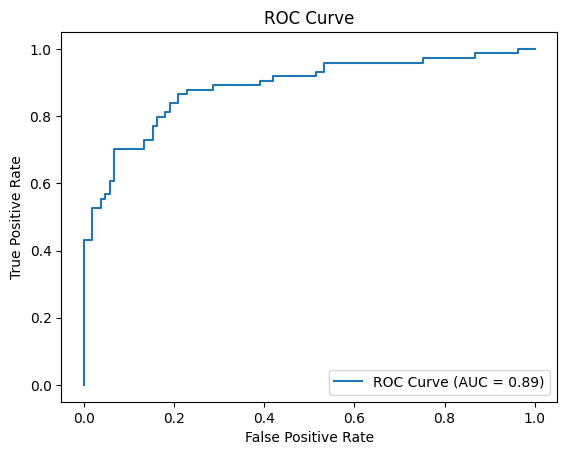

In [4]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC Score: {roc_auc}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


5. Interpretation of Coefficients

In [5]:
# Logistic Regression Coefficients
coefficients = pd.DataFrame(model.coef_.T, columns=['Coefficient'], index=df.columns.drop('survived'))
print(coefficients)

# Interpretation: Positive coefficients increase survival odds, while negative coefficients decrease them.


          Coefficient
pclass      -0.377970
sex         -1.259073
age         -0.394345
sibsp       -0.511978
parch       -0.220321
fare         0.101989
embarked    -0.154250
class       -0.377970
alone       -0.327637


6. Deployment with Streamlit

In [6]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.7 MB/s eta 0:00:00


Create a Python file (app.py) for the Streamlit app:

In [13]:
import streamlit as st
import pickle
import numpy as np

# Load the trained model (pickle it first from Colab and upload to the Streamlit environment)

df = pd.read_csv('Titanic_test.csv')

# Streamlit UI
st.title("Titanic Survival Prediction")

# Input fields
sex = st.selectbox("Sex (0 = female, 1 = male)", [0, 1])
pclass = st.selectbox("Passenger Class", [0, 1, 2])
age = st.slider("Age", 0, 100)
fare = st.slider("Fare", 0, 500)
siblings = st.slider("Siblings/Spouses Aboard", 0, 10)
parch = st.slider("Parents/Children Aboard", 0, 10)

# Button for prediction
if st.button("Predict"):
    features = np.array([[pclass, sex, age, fare, siblings, parch]])
    prediction = model.predict(features)
    st.write("Survival Prediction (1 = Survived, 0 = Did not survive): ", prediction[0])


2024-10-23 13:27:52.451 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:27:52.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:27:52.455 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:27:52.458 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:27:52.460 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:27:52.463 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:27:52.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:27:52.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [14]:
import streamlit as st
import pickle
import numpy as np

# Load the trained model (pickle it first from Colab and upload to the Streamlit environment)

df = pd.read_csv('Titanic_train.csv')

# Streamlit UI
st.title("Titanic Survival Prediction")

# Input fields
sex = st.selectbox("Sex (0 = female, 1 = male)", [0, 1])
pclass = st.selectbox("Passenger Class", [0, 1, 2])
age = st.slider("Age", 0, 100)
fare = st.slider("Fare", 0, 500)
siblings = st.slider("Siblings/Spouses Aboard", 0, 10)
parch = st.slider("Parents/Children Aboard", 0, 10)

# Button for prediction
if st.button("Predict"):
    features = np.array([[pclass, sex, age, fare, siblings, parch]])
    prediction = model.predict(features)
    st.write("Survival Prediction (1 = Survived, 0 = Did not survive): ", prediction[0])


2024-10-23 13:28:21.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:28:21.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:28:21.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:28:21.849 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:28:21.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:28:21.853 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:28:21.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-23 13:28:21.858 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Run the Streamlit app in the terminal or deploy online:

In [17]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
